# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 4

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 24.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

Zapisz:
- nazwy produktów w zmiennej `N`.
- ceny produktów w zmiennej `C`.
- stawki podatku w zmiennej `P`.

*(powyższe zmienne to tablice jednowymiarowe)*



In [2]:
import numpy as np

N = np.array(["Chleb", "Butelka wody (1l)", "Pomidor 1szt.", "Olej (1l)", "Szafran", "Krewetki (opakowanie)", "Lód (opakowanie)"])
C = np.array([3, 2, 2, 6, 24.5, 20, 5])
P = np.array([0.05, 0.08, 0.05, 0.05, 0.08, 0.23, 0.23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość) oraz kolejność produktów zgodnie z zad. 1A.

In [3]:
Z = np.array([2, 6, 0, 0, 0, 1, 0])  


#### Zadanie 1 C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`,
- operatora mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: transponuj jeden z wektorów i wykorzystaj mnożenie macierzy._

In [4]:
print(Z, C)

net_sum = (Z @ C.T).item()
print(f"{net_sum} PLN")

[2 6 0 0 0 1 0] [ 3.   2.   2.   6.  24.5 20.   5. ]
38.0 PLN


#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. 

* W tym zadaniu użyj operatora `*` do obliczenia cen brutto.
* Do obliczenia sumy użyj operatora mnożenia macierzy (podobnie jak w zad. 1C).
* Dodatkowo, wyświetl rachunek w postaci tabeli zawierającej kolumny: 
    - nazwa produktu,
    - cena netto, 
    - liczba sztuk, 
    - cena netto danej pozycji (cena netto x liczba sztuk), 
    - podatek (procentowo np. `5%`),
    - cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

**Oczekiwany wynik:**

```
Nazwa                       cena x szt.  netto   podatek   brutto
Chleb                       3.00 x 2      6.00        5%    ?????
Butelka wody (1l)           2.00 x 6     12.00        8%    ?????
Krewetki (opakowanie)      24.50 x 1     24.50       23%    ?????
=================================================================
Suma:                                                       ?????
```

_(w miejscu znaków zapytania powinny być wartości liczbowe)_

In [12]:
def calculate_gross(C, P, Z):
    gross_per_item = C * (1 + P)
    gross_total = (gross_per_item @ Z.T).item()
    return gross_per_item, gross_total

def print_receipt(N, C, P, Z):
    gross_per_item, gross_total = calculate_gross(C, P, Z)
    print(f"{'Nazwa':<30}{'cena x szt.':<20}{'netto':<10}{'podatek':<10}{'brutto':<10}")
    for i in range(len(N)):
        if Z[i] > 0:
            net_pos = C[i] * Z[i]
            gross_pos = gross_per_item[i] * Z[i]
            print(f"{N[i]:<30}{C[i]:>6.2f} x {Z[i]:<3}{net_pos:>10.2f} zł {P[i]*100:>6.0f}% {gross_pos:>12.2f} zł")
    print("="*80)
    print(f"Suma: {'':<65}{gross_total:.2f} zł")


print_receipt(N, C, P, Z)

Nazwa                         cena x szt.         netto     podatek   brutto    
Bread                           3.00 x 2        6.00 zł      5%         6.30 zł
Oil (1l)                        6.00 x 1        6.00 zł      5%         6.30 zł
Saffron                        24.50 x 1       24.50 zł      8%        26.46 zł
Ice (package)                   5.00 x 3       15.00 zł     23%        18.45 zł
Suma:                                                                  57.51 zł


### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv`, a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1). Minimum 5 produktów.


In [13]:
products = np.loadtxt('produkty.csv', delimiter=',', dtype={'names': ('Product', 'Net_Price', 'Tax'), 'formats': ('U50', 'f8', 'f8')}, encoding='utf-8', skiprows=1)
N, C, P = products['Product'], products['Net_Price'], products['Tax']

Z = np.genfromtxt('rachunek.csv', delimiter=',', dtype=int, skip_header=1)

print_receipt(N, C, P, Z)

Nazwa                         cena x szt.         netto     podatek   brutto    
Bread                           3.00 x 2        6.00 zł      5%         6.30 zł
Oil (1l)                        6.00 x 1        6.00 zł      5%         6.30 zł
Saffron                        24.50 x 1       24.50 zł      8%        26.46 zł
Ice (package)                   5.00 x 3       15.00 zł     23%        18.45 zł
Suma:                                                                  57.51 zł


### Zadanie 3 - gra 2048

Dana jest kwadratowa plansza o boku `SIZE` (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). 
Każdy wiersz zawiera od 0 do 4 liczb. Należy, z wykorzystaniem konstrukcji Numpy, zasymulować ruch w lewo, w prawo, w górę i w dół planszy zgodnie z regułami gry (ale **BEZ** dodawania nowego kafelka w losowym miejscu). Innymi słowy, trzeba napisać cztery funkcje: 
- `move_left(...)`, 
- `move_right(...)`, 
- `move_up(...)`, 
- `move_down(...)`.

Przykład ruchu w prawo:

Wejściem i wyjściem każdej z wymienionych funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj się napisać funkcję tylko do jednego ruchu, a pozostałe trzy niech się do niej w sprytny sposób odwołują.

#### Przykład ruchu w prawo:
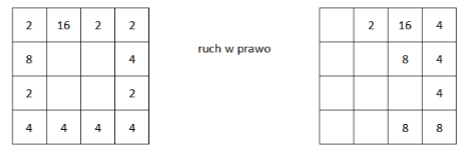

In [21]:
def merge(row):
    non_zero = row[row != 0]
    for i in range(len(non_zero) - 1):
        if non_zero[i] == non_zero[i + 1]:
            non_zero[i] *= 2
            non_zero[i + 1] = 0
    return np.append(non_zero[non_zero != 0], [0] * (len(row) - len(non_zero[non_zero != 0])))

def move_left(board):
    return np.array([merge(row) for row in board])

def move_right(board):
    return np.array([merge(row[::-1])[::-1] for row in board])

def move_up(board):
    return np.transpose(np.array([merge(row) for row in np.transpose(board)]))

def move_down(board):
    return np.transpose(np.array([merge(row[::-1])[::-1] for row in np.transpose(board)]))

SIZE = 4
board = np.random.choice(
    [0, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], 
    size=(SIZE, SIZE)
)

print("Original board:")
print(board)

print("\nMove left:")
print(move_left(board))

print("\nMove right:")
print(move_right(board))

print("\nMove up:")
print(move_up(board))

print("\nMove down:")
print(move_down(board))

Original board:
[[  32    8   16  512]
 [   0 1024    0   32]
 [   2    2    2   16]
 [   0 1024  256    4]]

Move left:
[[  32.    8.   16.  512.]
 [1024.   32.    0.    0.]
 [   4.    2.   16.    0.]
 [1024.  256.    4.    0.]]

Move right:
[[  32.    8.   16.  512.]
 [   0.    0. 1024.   32.]
 [   0.    2.    4.   16.]
 [   0. 1024.  256.    4.]]

Move up:
[[  32.    8.   16.  512.]
 [   2. 1024.    2.   32.]
 [   0.    2.  256.   16.]
 [   0. 1024.    0.    4.]]

Move down:
[[   0.    8.    0.  512.]
 [   0. 1024.   16.   32.]
 [  32.    2.    2.   16.]
 [   2. 1024.  256.    4.]]
